<a href="https://colab.research.google.com/github/MayankgudadheCI/Firstrepo/blob/master/Introduction_to_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> A Picture is worth a thousand words! </b></u>

## <b> Introducing Matplotlib and Seaborn for data visualization

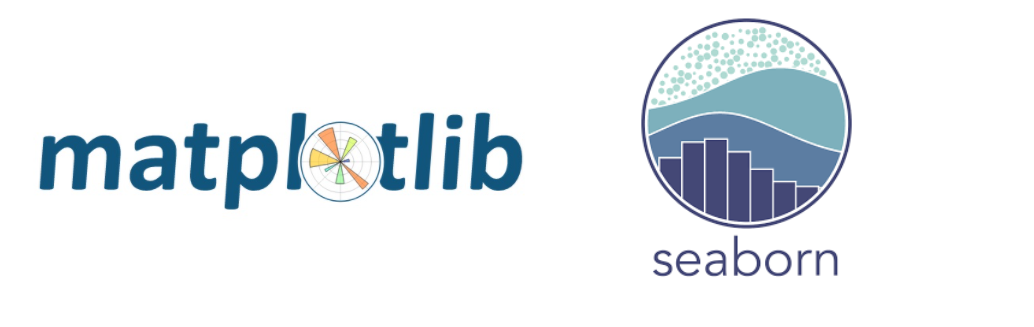

[0 1 2 3 4]


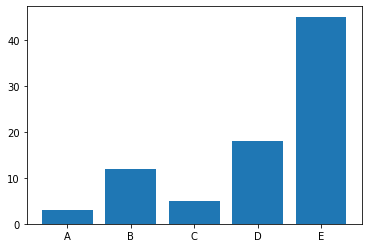

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))
print(y_pos)

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

## Matplotlib.Pyplot
* One of the core aspects of Matplotlib is matplotlib.pyplot. It is Matplotlib's scripting layer. It is a collection of command style functions that make Matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. We will work both with the scripting and artist layer.

## Let's jump directly onto the data which we will use today for demonstrating the utiltiies of Matplotlib 

* Price Paid Data tracks the residential property sales in England and Wales that are lodged with HM Land Registry for registration.

* The dataset is a reliable source of house price information and consists of more than a million definitive records for the annual year 2018

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import pandas 
import pandas as pd

In [ ]:
# Define the path where data is kept
path = '/content/drive/MyDrive/dat/'

In [ ]:
df = pd.read_csv(path + 'pp-2018.csv', names = ["TID","Price","Sale Date", "Postcode",
                                    "Property Type","New Build","Tenure",
                                    "PAON","SAON","Street","Locality",
                                    "Town/City","District","County",
                                    "PPD Category","Record Status"],
                            parse_dates= ["Sale Date"])

In [ ]:
df.shape

(1024432, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959003 entries, 0 to 1024431
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TID            959003 non-null  object        
 1   Price          959003 non-null  int64         
 2   Sale Date      959003 non-null  datetime64[ns]
 3   Postcode       958301 non-null  object        
 4   Property Type  959003 non-null  object        
 5   New Build      959003 non-null  object        
 6   Tenure         959003 non-null  object        
 7   PAON           959003 non-null  object        
 8   SAON           127930 non-null  object        
 9   Street         945361 non-null  object        
 10  Locality       359120 non-null  object        
 11  Town/City      959003 non-null  object        
 12  District       959001 non-null  object        
 13  County         959003 non-null  object        
 14  PPD Category   959003 non-null  object        
 15 

In [ ]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A


### Below is a description of the columns/variables in our Price Paid data

* Transaction unique identifier --- A reference number which is generated automatically recording each published sale. 
The number is unique and will change each time a sale is recorded.
* Price ---- Sale price stated on the transfer deed.
* Date of Transfer ---- Date when the sale was completed, as stated on the transfer deed.
* Postcode ---- This is the postcode used at the time of the original transaction. Note that postcodes can be reallocated    and these changes are not reflected in the Price Paid Dataset.
* Property Type ---- D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other
* Newly built  ----- Y = a newly built property, N = an established residential building
* Duration	Relates to the tenure: F = Freehold, L= Leasehold etc.

* Street
* Locality 
* Town/City 
* District
* County 
* PPD Category Type ---- Indicates the type of Price Paid transaction.

* Record Status - monthly file only --- Indicates additions, changes and deletions to the records.(see guide below).
                                    A = Addition, C = Change, D = Delete.



In [ ]:
df.shape

(1024432, 16)

* Next we will filter the data to get all the transaction for a particular year and month ( say July 2018 for example). We will only keep transactions of type "A" (Additions) in the data frame and get rid of Changes and Deletions. And for the sake of simplicity we will also remove transactions for property type "O" (Other) and focus only on Detached ("D"), Semi Detached ("S"), Flats ("F") and Terraced ("T") houses.

In [ ]:
#Select only record type A and property type not "O"
df = df.loc[df['Record Status'] == 'A']
df = df.loc[df['Property Type'] != 'O']

# Select transactions for 2018
df = df[(df["Sale Date"].dt.year==2018)]

In [ ]:
df.shape

(959003, 16)

## First objective : Obtain the trend of sales volume across months

### Our first step would be to add the below two lines of code for importing the matplotlib.pyplot and to set the output of the plotting to be displayed inline.

* **%matplotlib inline** sets the backend of matplotlib to the 'inline' backend 
* With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [ ]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [ ]:
from datetime import datetime

# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959003 entries, 0 to 1024431
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TID            959003 non-null  object        
 1   Price          959003 non-null  int64         
 2   Sale Date      959003 non-null  datetime64[ns]
 3   Postcode       958301 non-null  object        
 4   Property Type  959003 non-null  object        
 5   New Build      959003 non-null  object        
 6   Tenure         959003 non-null  object        
 7   PAON           959003 non-null  object        
 8   SAON           127930 non-null  object        
 9   Street         945361 non-null  object        
 10  Locality       359120 non-null  object        
 11  Town/City      959003 non-null  object        
 12  District       959001 non-null  object        
 13  County         959003 non-null  object        
 14  PPD Category   959003 non-null  object        
 15 

In [ ]:
%%time
df['Month'] = df['Sale Date'].dt.to_period('M')

CPU times: user 123 ms, sys: 0 ns, total: 123 ms
Wall time: 123 ms


In [ ]:
%%time
df['Month'] = df['Sale Date'].dt.strftime('%m/%Y')

CPU times: user 5.23 s, sys: 106 ms, total: 5.33 s
Wall time: 6 s


In [ ]:
%%time
df['yyyy'] = pd.to_datetime(df['Sale Date']).dt.year
df['mm'] = pd.to_datetime(df['Sale Date']).dt.month

CPU times: user 294 ms, sys: 3.87 ms, total: 298 ms
Wall time: 313 ms


In [ ]:
# Create a variable month to denote the transaction month
%%time
df['Month']= df['Sale Date'].apply(lambda x: x.strftime("%Y-%m-%d") [:7])

CPU times: user 6.41 s, sys: 311 ms, total: 6.72 s
Wall time: 6.78 s


In [ ]:
df.head()

,TID,Price,Sale Date,Postcode,Property Type,New Build,Tenure,PAON,SAON,Street,Locality,Town/City,District,County,PPD Category,Record Status,Month,yyyy,mm
0,{666758D7-43A9-3363-E053-6B04A8C0D74E},405000,2018-01-25,WR15 8LH,D,N,F,RAMBLERS WAY,NaN,NaN,BORASTON,TENBURY WELLS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01,2018,1
1,{666758D7-43AA-3363-E053-6B04A8C0D74E},315000,2018-01-23,SY7 8QA,D,N,F,MONT CENISE,NaN,NaN,CLUN,CRAVEN ARMS,SHROPSHIRE,SHROPSHIRE,A,A,2018-01,2018,1
2,{666758D7-43AD-3363-E053-6B04A8C0D74E},165000,2018-01-19,SY1 2BF,T,Y,F,42,NaN,PENSON WAY,NaN,SHREWSBURY,SHROPSHIRE,SHROPSHIRE,A,A,2018-01,2018,1
3,{666758D7-43B0-3363-E053-6B04A8C0D74E},370000,2018-01-22,SY8 4DF,D,N,F,WILLOW HEY,NaN,NaN,ASHFORD CARBONEL,LUDLOW,SHROPSHIRE,SHROPSHIRE,A,A,2018-01,2018,1
4,{666758D7-43B3-3363-E053-6B04A8C0D74E},320000,2018-01-19,TF10 7ET,D,N,F,3,NaN,PRINCESS GARDENS,NaN,NEWPORT,WREKIN,WREKIN,A,A,2018-01,2018,1


In [ ]:
%%time
monthly_sales_vol = df["Month"].value_counts()

CPU times: user 96.4 ms, sys: 1.13 ms, total: 97.5 ms
Wall time: 101 ms


In [ ]:
monthly_sales_vol

2018-08    95382
2018-11    92427
2018-06    90178
2018-10    86892
2018-07    83082
2018-12    79754
2018-03    78070
2018-09    77836
2018-05    76325
2018-04    67094
2018-02    66959
2018-01    65004
Name: Month, dtype: int64

In [ ]:
%%time
df_new = df.groupby('Month')['TID'].count().reset_index().rename(columns = {"TID" : "Monthly_sales_in_2018"})

CPU times: user 136 ms, sys: 3.98 ms, total: 140 ms
Wall time: 169 ms


In [ ]:
df_new

,Month,Monthly_sales_in_2018
0,2018-01,65004
1,2018-02,66959
2,2018-03,78070
3,2018-04,67094
4,2018-05,76325
5,2018-06,90178
6,2018-07,83082
7,2018-08,95382
8,2018-09,77836
9,2018-10,86892


In [ ]:
df_new.Monthly_sales_in_2018.values

array([65004, 66959, 78070, 67094, 76325, 90178, 83082, 95382, 77836,
       86892, 92427, 79754])

In [ ]:
type(monthly_sales_vol)

pandas.core.series.Series

In [ ]:
monthly_sales_vol.sort_index(inplace=True)

In [ ]:
monthly_sales_vol

2018-01    65004
2018-02    66959
2018-03    78070
2018-04    67094
2018-05    76325
2018-06    90178
2018-07    83082
2018-08    95382
2018-09    77836
2018-10    86892
2018-11    92427
2018-12    79754
Name: Month, dtype: int64

In [ ]:
#figsize : (float, float), optional, default: None
#width, height in inches. If not provided, defaults to rcParams["figure.figsize"] = [6.4, 4.8].

plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
monthly_sales_vol

2018-01    65004
2018-02    66959
2018-03    78070
2018-04    67094
2018-05    76325
2018-06    90178
2018-07    83082
2018-08    95382
2018-09    77836
2018-10    86892
2018-11    92427
2018-12    79754
Name: Month, dtype: int64

Text(0.5, 0, 'Month in year 2018')

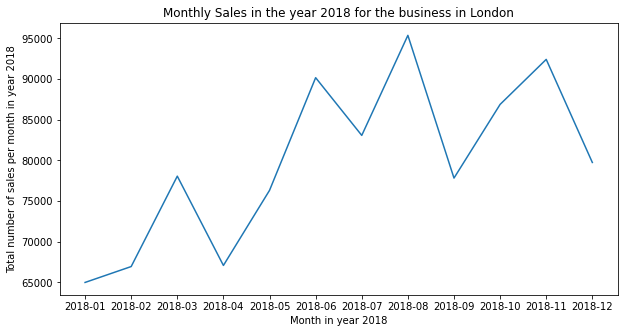

In [ ]:
# Create the plot object
plt.plot(monthly_sales_vol)

plt.title('Monthly Sales in the year 2018 for the business in London')
plt.ylabel('Total number of sales per month in year 2018')
plt.xlabel('Month in year 2018')

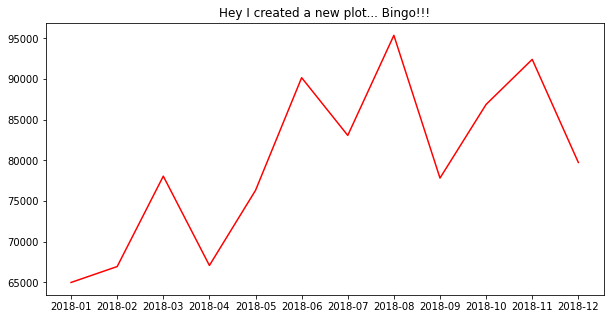

In [ ]:
# Draw plot
plt.plot('Month', 'Monthly_sales_in_2018', data=df_new, color='red')

plt.title("Hey I created a new plot... Bingo!!!")

plt.show()

Text(0.5, 0, 'Month in 2018')

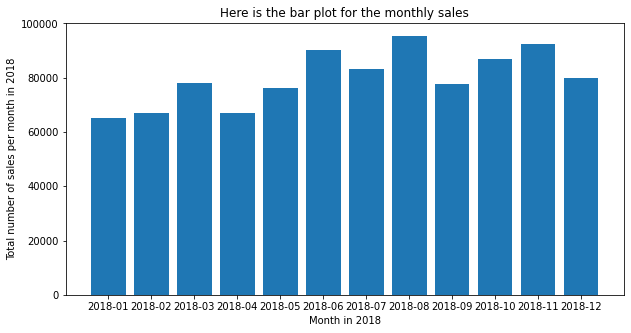

In [ ]:
plt.bar(df_new.Month.values,df_new.Monthly_sales_in_2018.values,align='center') # A bar chart

plt.title("Here is the bar plot for the monthly sales")
plt.ylabel('Total number of sales per month in 2018')
plt.xlabel('Month in 2018')

In [ ]:
#pip install plotly

import plotly.express as px

fig = px.line(df_new, x="Month", y="Monthly_sales_in_2018", title='Total number of sales')
fig.show()

## Second objective :  Observe the daily sales volume in the month of July 2018

In [ ]:
# Daily sales volume for July 2018
df = df[df['Sale Date'].dt.month == 7]

daily_sales_vol = df["Sale Date"].value_counts()

In [ ]:
daily_sales_vol

2018-07-27    11145
2018-07-20     8802
2018-07-06     8400
2018-07-13     6561
2018-07-31     5047
2018-07-12     3568
2018-07-30     3429
2018-07-26     2965
2018-07-02     2931
2018-07-16     2883
2018-07-23     2742
2018-07-25     2710
2018-07-19     2571
2018-07-18     2438
2018-07-05     2358
2018-07-09     2259
2018-07-11     2165
2018-07-24     2116
2018-07-04     2064
2018-07-10     1985
2018-07-17     1933
2018-07-03     1828
2018-07-28       31
2018-07-14       25
2018-07-29       25
2018-07-21       21
2018-07-15       20
2018-07-07       18
2018-07-01       18
2018-07-22       13
2018-07-08       11
Name: Sale Date, dtype: int64

In [ ]:
daily_sales_vol.sort_index(inplace=True)

In [ ]:
daily_sales_vol.index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', freq=None)

### Creating a Line plot 

Text(0.5, 0, 'Date')

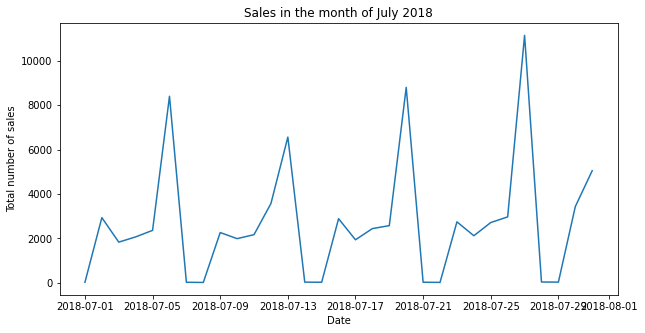

In [ ]:
# Create the plot object
# daily_sales_vol.plot()
daily_sales_vol.plot(linestyle='--', marker='*', color = "red")

# plt.plot(daily_sales_vol)

plt.title('Sales in the month of July 2018')
plt.ylabel('Total number of sales')
plt.xlabel('Date')

#linestyle = '-', '--', '-.', ':'

In [ ]:
df_new = df.groupby('Sale Date')['TID'].count().reset_index().rename(columns = {"TID" : "sales_in_july"})

In [ ]:
df_new

,Sale Date,sales_in_july
0,2018-07-01,18
1,2018-07-02,2931
2,2018-07-03,1828
3,2018-07-04,2064
4,2018-07-05,2358
5,2018-07-06,8400
6,2018-07-07,18
7,2018-07-08,11
8,2018-07-09,2259
9,2018-07-10,1985


In [ ]:
import plotly.express as px

fig = px.line(df_new, x="Sale Date", y="sales_in_july", title='Total number of sales in July 2018')
fig.show()

## Third Objective :  Comparing the daily sales volume of different property types in July

### Creating mutliple line plots in the same figure

In [ ]:
daily_price = df.groupby(['Sale Date','Property Type'])['TID'].count().unstack()

In [ ]:
daily_price

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


In [ ]:
df.groupby(['Sale Date','Property Type'])['TID'].count()

Sale Date   Property Type
2018-07-01  D                   4
            F                   2
            S                   7
            T                   5
2018-07-02  D                 705
                             ... 
2018-07-30  T                 976
2018-07-31  D                1316
            F                1014
            S                1353
            T                1364
Name: TID, Length: 124, dtype: int64

In [ ]:
daily_price.columns

Index(['D', 'F', 'S', 'T'], dtype='object', name='Property Type')

In [ ]:
daily_price.shape

(31, 4)

Text(0.5, 0, 'Date')

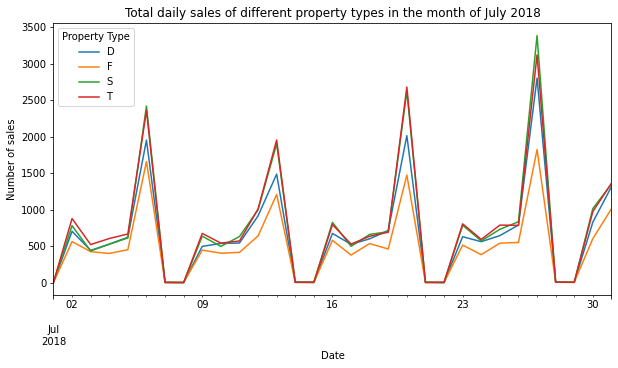

In [ ]:

daily_price.plot()

plt.title('Total daily sales of different property types in the month of July 2018')
plt.ylabel('Number of sales')
plt.xlabel('Date')


In [ ]:
list(daily_price.columns)

['D', 'F', 'S', 'T']

In [ ]:
daily_price

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,4,2,7,5
2018-07-02,705,564,782,880
2018-07-03,443,426,436,523
2018-07-04,529,401,528,606
2018-07-05,623,453,614,668
2018-07-06,1955,1662,2422,2361
2018-07-07,7,6,2,3
2018-07-08,2,4,1,4
2018-07-09,498,447,638,676


In [ ]:
daily_price.reset_index(inplace=True)

In [ ]:
daily_price_melt = daily_price.melt(id_vars=["Sale Date"], 
        var_name="Property Type", 
        value_name="Count")

In [ ]:
daily_price_melt

,Sale Date,Property Type,Count
0,2018-07-01,D,4
1,2018-07-02,D,705
2,2018-07-03,D,443
3,2018-07-04,D,529
4,2018-07-05,D,623
...,...,...,...
119,2018-07-27,T,3125
120,2018-07-28,T,8
121,2018-07-29,T,8
122,2018-07-30,T,976


In [ ]:
import plotly.express as px

fig = px.line(daily_price_melt, x="Sale Date", y="Count", color='Property Type')
fig.show()

### Creating a bar plot

* A bar chart is really helpful when we want to see for example the total sales volume by different Property types. 
* To check how a particular variable varies across different categories/groups of another variable we use a Bar plot

* To plot a horizontal bar chart, we set the argument kind='barh'. The sort_values() function sorts the values in ascending order by default.

## Fourth Objective :  Draw comparison among different property types in terms of sales

In [ ]:
# Number of residential property transactions in Aug 2018 by property type
sales_by_type = df["Property Type"].value_counts()

In [ ]:
sales_by_type

T    23630
S    23501
D    20406
F    15545
Name: Property Type, dtype: int64

Text(0.5, 0, 'Property Type')

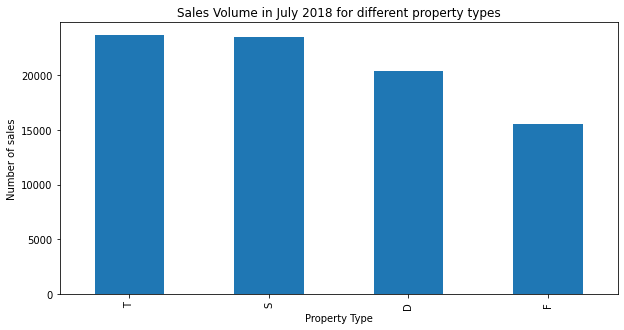

In [ ]:

# Create the plot object
sales_by_type.plot(kind='bar')

plt.title('Sales Volume in July 2018 for different property types')
plt.ylabel('Number of sales')
plt.xlabel('Property Type')

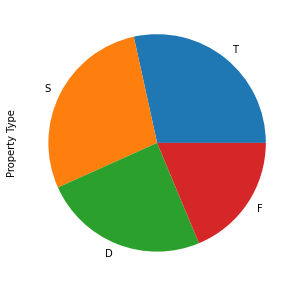

In [ ]:
# library
import matplotlib.pyplot as plt

# create data: an array of values
size_of_groups=list(sales_by_type.values)

# Create a pieplot
# plt.pie(size_of_groups)
sales_by_type.plot(kind='pie')
plt.show()

## Fourth Objective : Average house prices for different property types in July

## Using an Axes instance from Matplotlib

In [ ]:
avg_price_ppt_type = df.groupby(['Property Type'])['Price'].mean()

In [ ]:
avg_price_ppt_type

Property Type
D    420870.312359
F    306578.147507
S    260353.586613
T    248855.367203
Name: Price, dtype: float64

Text(0, 0.5, 'Average prices ')

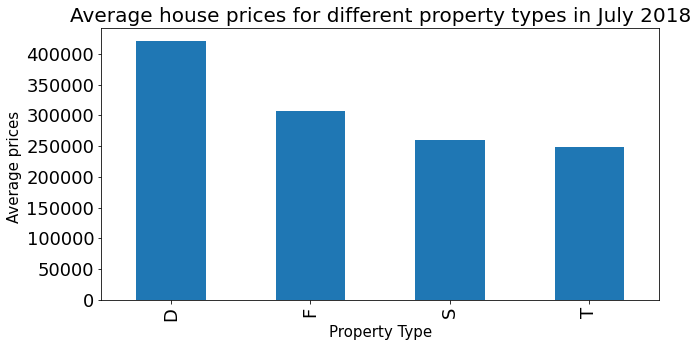

In [ ]:
# Create the figure object 
ax = avg_price_ppt_type.plot.bar(figsize = (10,5),fontsize = 18)

# Set the title
ax.set_title("Average house prices for different property types in July 2018", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Property Type", fontsize = 15)
ax.set_ylabel("Average prices ", fontsize = 15)

In [ ]:
df.describe()

,Price,yyyy,mm
count,8.308200e+04,83082.0,83082.0
mean,3.051571e+05,2018.0,7.0
std,3.309047e+05,0.0,0.0
min,1.000000e+00,2018.0,7.0
25%,1.520000e+05,2018.0,7.0
50%,2.350000e+05,2018.0,7.0
75%,3.630000e+05,2018.0,7.0
max,2.121000e+07,2018.0,7.0


## Box plot

* Also called as **box and whisker plot**, is a way of showing the distribution of data in a five-number summary.

* Below we will create a box plot which shows the price distribution for all the four different property types.

## Fifth Objective : Obtain the average house price distribution for different property types

In [ ]:
df_sales = df.groupby(['Sale Date', 'Property Type'])['Price'].mean().unstack()

In [ ]:
df_sales

Property Type,D,F,S,T
Sale Date,,,,
2018-07-01,540000.000000,109000.000000,172571.428571,217400.000000
2018-07-02,445515.668085,350084.714539,270838.773657,255916.592045
2018-07-03,447700.440181,373247.507042,247046.855505,269273.124283
2018-07-04,438009.792060,334057.576060,280296.412879,242835.457096
2018-07-05,458506.836276,333304.015453,269661.234528,245529.871257
2018-07-06,388179.344246,280558.135379,248347.932700,223573.152478
2018-07-07,383420.714286,267990.833333,157500.000000,490333.333333
2018-07-08,213500.000000,147123.750000,245000.000000,116250.000000
2018-07-09,401749.847390,301908.429530,265197.501567,291172.751479


Text(0.5, 0, 'Property Type')

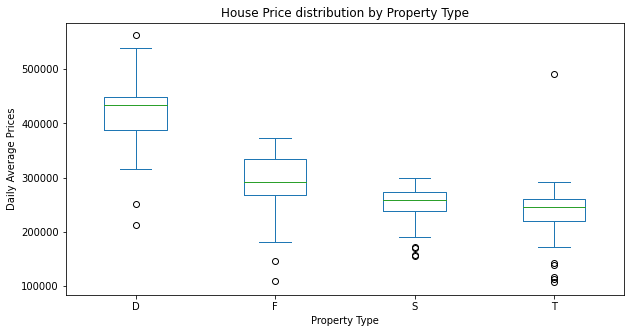

In [ ]:
# Price distribution box plot
df_sales.plot(kind="box")
plt.title('House Price distribution by Property Type')
plt.ylabel('Daily Average Prices')
plt.xlabel('Property Type')

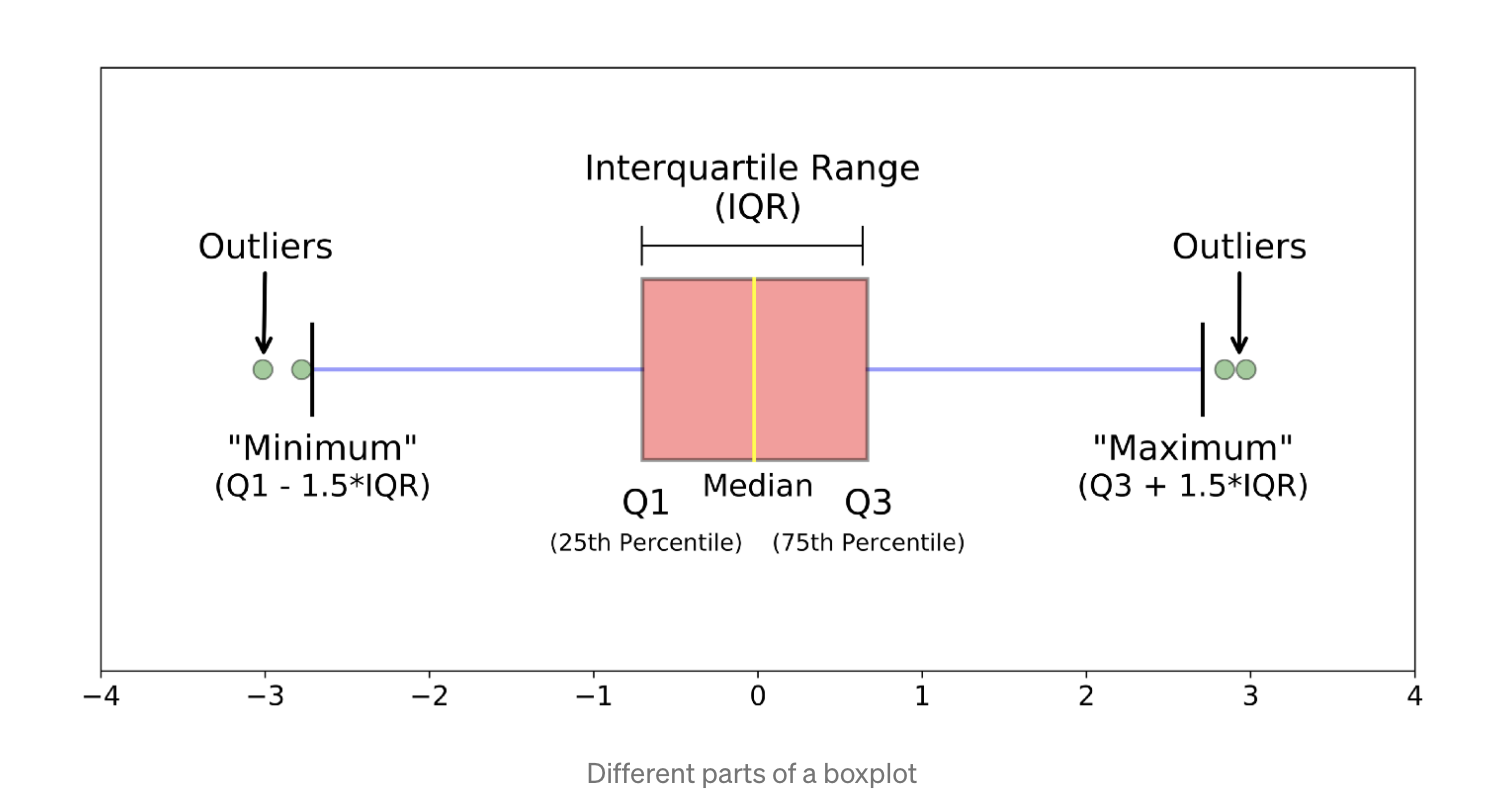

Whiskers are set at 1.5 * IQR ( Q3 - Q1)

# Exploring Seaborn

Seaborn is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

## Speed Dating Dataset

In [ ]:
dating_data = pd.read_csv(path+ 'Speed Dating Data.csv', encoding = 'unicode_escape')

In [ ]:
dating_data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
dating_data.columns.values

array(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round',
       'position', 'positin1', 'order', 'partner', 'pid', 'match',
       'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin',
       'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o',
       'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1',
       'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_

In [ ]:
dating_data.shape

(8378, 195)

# Histogram

In [ ]:
import numpy as np

Text(0, 0.5, 'Frequency')

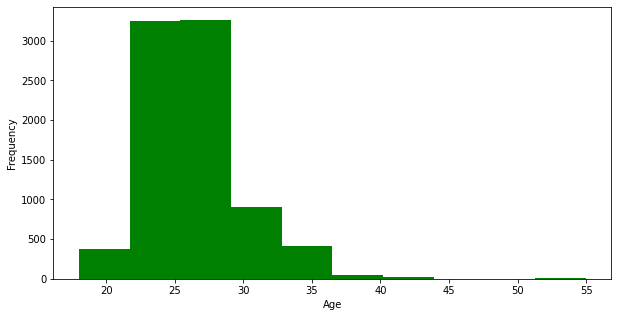

In [ ]:
age = dating_data[~dating_data['age'].isna()]['age']
plt.hist(age.values, color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [ ]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



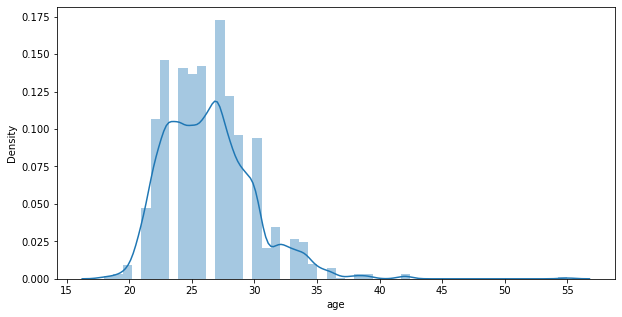

In [ ]:
sns.distplot(age, hist=True)

# Understanding correlation

In [ ]:
# Positively correlated data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [2, 3, 4, 6, 6, 7, 8, 9, 10, 11]

In [ ]:
# Negatively correlated data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [11, 10, 9, 8, 7, 6, 6, 4, 3, 2]

In [ ]:
# Zero correlation
x = [1, 2, 3, 4]
y = [7, 6, 4, 3]

In [ ]:
df = pd.DataFrame(data={'x': x, 'y': y})

In [ ]:
df

,x,y
0,1,7
1,2,6
2,3,4
3,4,3


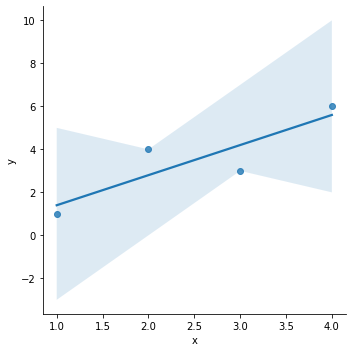

In [ ]:
sns.lmplot(x='x', y='y', data=df)

In [ ]:
df.corr()

,x,y
x,1.000000,-0.989949
y,-0.989949,1.000000


# Correlation Heatmap

In [ ]:
dating_data_df = dating_data[['gender', 'shopping', 'gaming', 'concerts', 'music']]

In [ ]:
dating_data_df.gender.value_counts()

1    4194
0    4184
Name: gender, dtype: int64

In [ ]:
corr_df = dating_data_df.corr()

In [ ]:
corr_df

,gender,shopping,gaming,concerts,music
gender,1.000000,-0.330718,0.219619,-0.128339,-0.076850
shopping,-0.330718,1.000000,0.093467,0.205389,0.208329
gaming,0.219619,0.093467,1.000000,0.098806,0.043301
concerts,-0.128339,0.205389,0.098806,1.000000,0.655728
music,-0.076850,0.208329,0.043301,0.655728,1.000000


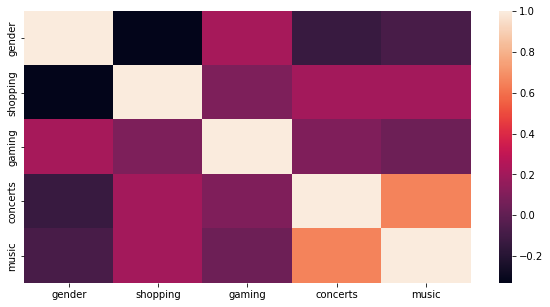

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

### Make the map more intuitive

* Set the minimum value for the color scale at -1
* Make your heatmap more visually pleasing : https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/
* Annotate values

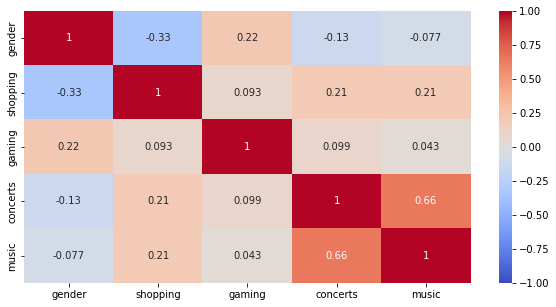

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dating_data_df.corr(), vmin=-1, cmap='coolwarm', annot=True)

# Two-way Plots

In [ ]:
dating_data_df.head()

,gender,shopping,gaming,concerts,music
0,0,8.0,1.0,10.0,9.0
1,0,8.0,1.0,10.0,9.0
2,0,8.0,1.0,10.0,9.0
3,0,8.0,1.0,10.0,9.0
4,0,8.0,1.0,10.0,9.0


In [ ]:
dating_data_df.shape

(8378, 5)

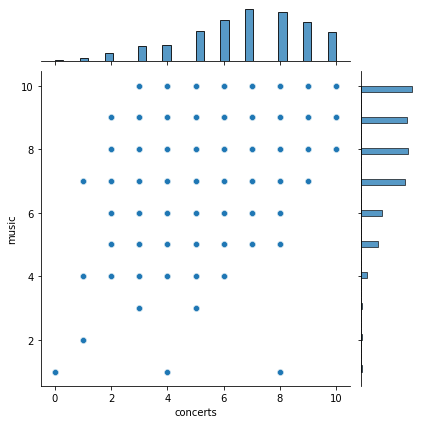

In [ ]:
sns.jointplot(x='concerts', y='music', data=dating_data_df)

In [ ]:
dating_data_df[(dating_data_df['concerts'] == 7) & (dating_data_df['music'] == 10)]

,gender,shopping,gaming,concerts,music
694,1,6.0,3.0,7.0,10.0
695,1,6.0,3.0,7.0,10.0
696,1,6.0,3.0,7.0,10.0
697,1,6.0,3.0,7.0,10.0
698,1,6.0,3.0,7.0,10.0
...,...,...,...,...,...
8285,1,4.0,5.0,7.0,10.0
8286,1,4.0,5.0,7.0,10.0
8287,1,4.0,5.0,7.0,10.0
8288,1,4.0,5.0,7.0,10.0
